# Aprendizagem por árvore de decisão

## Introdução

Esse algoritmo ele criará uma árvore de decisão, na qual basicamente é uma ordem de regras que a máquina deve seguir. O algoritmo ele monta essa árvore de decisão a partir de um base de dados histórica, e faz isso com ajuda de duas fórmulas matemática:

* Entropia: $S = \sum\limits_{i=1}^{c}-p_i log_2p_i$;
* Ganho de informação: $G(S, A) = S - \sum\limits_{v \epsilon Values(A)}\frac{|S_v|}{|S|}S_v$.

### Exemplo do curso - aprendizagem

Dada uma base de dados histórica com o risco alto, moderado e baixo com as respectivas probabilidades: 6/14, 3/14 e 5/14. Então,

$$E(s) = -\frac{6}{14} log_2\frac{6}{14} - \frac{3}{14} log_2 \frac{3}{14} - \frac{5}{14} log_2\frac{5}{14} = 1,53$$,

essa é a entropia geral.

Para o ganho de informação, devemos determila-lo para o atributo História, dívida, garantias e renda, cujo dependendo de qual atributo tiver o maior valor de gnaho de informação, significa que esse é o atributo mais significativo, logo este deve fica na raiz da árvore. Para isso, por exemplo para a história de crédito, devemos determinar a entropia para hitória de crédito boa, desconhecida e ruim.

**OBS**: caso alguma probabilidade seja zero, no momento de determinar alguma entropia, apenas deve-se desconsiderar o termo em que o zero aparece.

Dado que, a entropia para o histórico de crétido boa, desconhecida e ruim é $1,37$, $1,52$ e $0,81$, respectivamente. Assim, o gnaho de informação para o histórico de crédito é:

$$Ganho(História) = 1,53 - \frac{5}{14}1,37 - \frac{5}{14}1,52 - \frac{4}{14}0,81 = 0,26$$

Vamos calcular agora o ganho para dívida, com isso devemos calcular a entropia da dívida alta e baixa, cujo são $1,38$ e $1,56$, respectivamente. Logo,

$$Ganho(Divída) = 1,53 - \frac{7}{14}1,38 - \frac{7}{14}1,56 = 0,06$$.

Agora para a garantia, vmaos calcular primeiramente a entropia da garantia de nenhuma e adequada, que são de $1,44$ e $0,92$, respectivamente. Logo, $$Ganho(Garantias) = 1,53 - \frac{11}{14}1,44 - \frac{3}{14}0,92 = 0,2$$.

Por últimos, vamos calcular o gnaho d einformação para a renda anual, devemos calcular a entropia para renda $<15$, $>=15$ e $>35$, os quais valem $0,00$, $1,00$ e $1,15$, respectivamente. Assim,

$$Ganho(Renda) = 1,53 -\frac{3}{14}0 - \frac{4}{14}1 - \frac{7}{14}1,15 = 0,66$$.

**OBS**: quanto menor o valor da entropia melhor é a distribuição dos dados, assim fica mais fácil de fazera  classificação com aquele registro.

Dessa forma, podemos vemos que a renda é que deve ficar na raiz da árvore e para cada ramo que é criada pela rende devemos calcular os cálculos da entropia e do ganho de informação apra cada ramo.

Depois que a árvore está completa deve-se fazer uma poda na árvore de decisão:
* Bias (viés) - erros por classificação errada.
* Variância:
    - Erros por sensibilidade pequena a mudanças na base de treinamento.
    - Pode levar a overfiting.

## Árvore de decisão - base risco crédito

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)

In [3]:
x_risco_credito, y_risco_credito

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [2, 1, 0, 2],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [4]:
#agora vamos criar a árvore de decisão
arvore_risco_credito = DecisionTreeClassifier(criterion = 'entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito) # o .fit encaixar os dados no algoritmo

DecisionTreeClassifier(criterion='entropy')

In [5]:
arvore_risco_credito.feature_importances_ #retornará os ganhos de informação de cada atributo

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

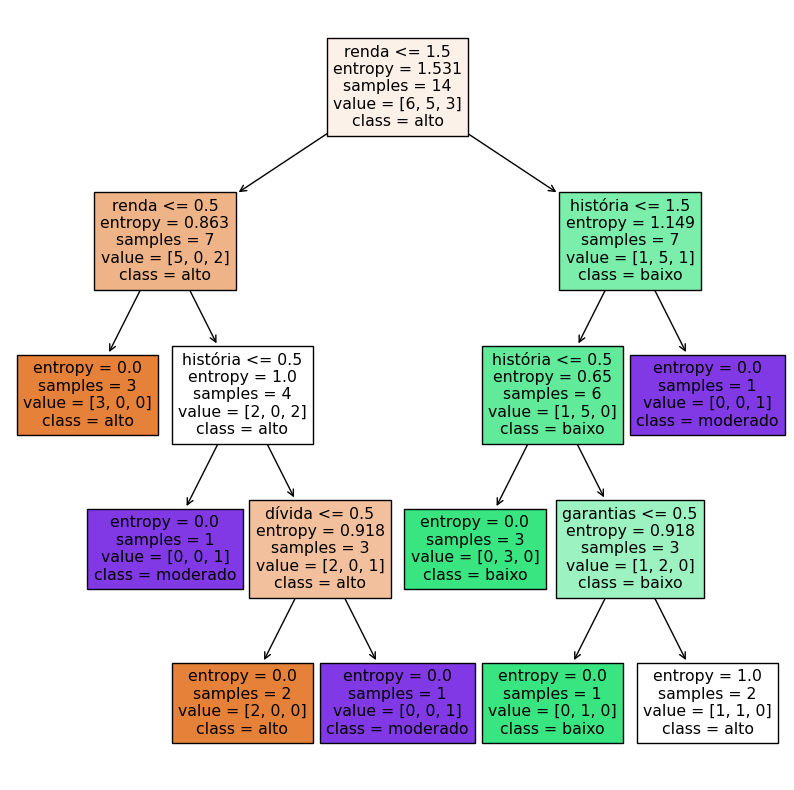

In [6]:
from sklearn import tree
import matplotlib.pyplot as plt
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows = 1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = list(arvore_risco_credito.classes_), filled = True); #poderemos visualizar a árvore de decisão

In [7]:
# história bpa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequadas, renda < 15
previsoes = arvore_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

## Árvore de decisão - base crédito

In [8]:
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [9]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [10]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [11]:
#criando a árvora
arvore_credit = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [13]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [14]:
from sklearn.metrics import accuracy_score, classification_report

In [15]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

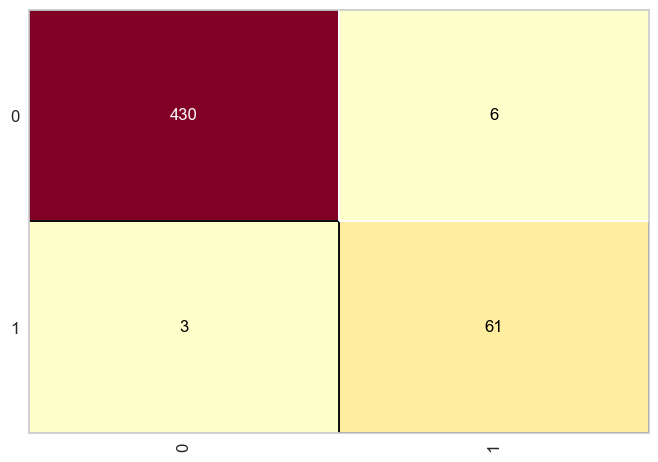

In [16]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [17]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



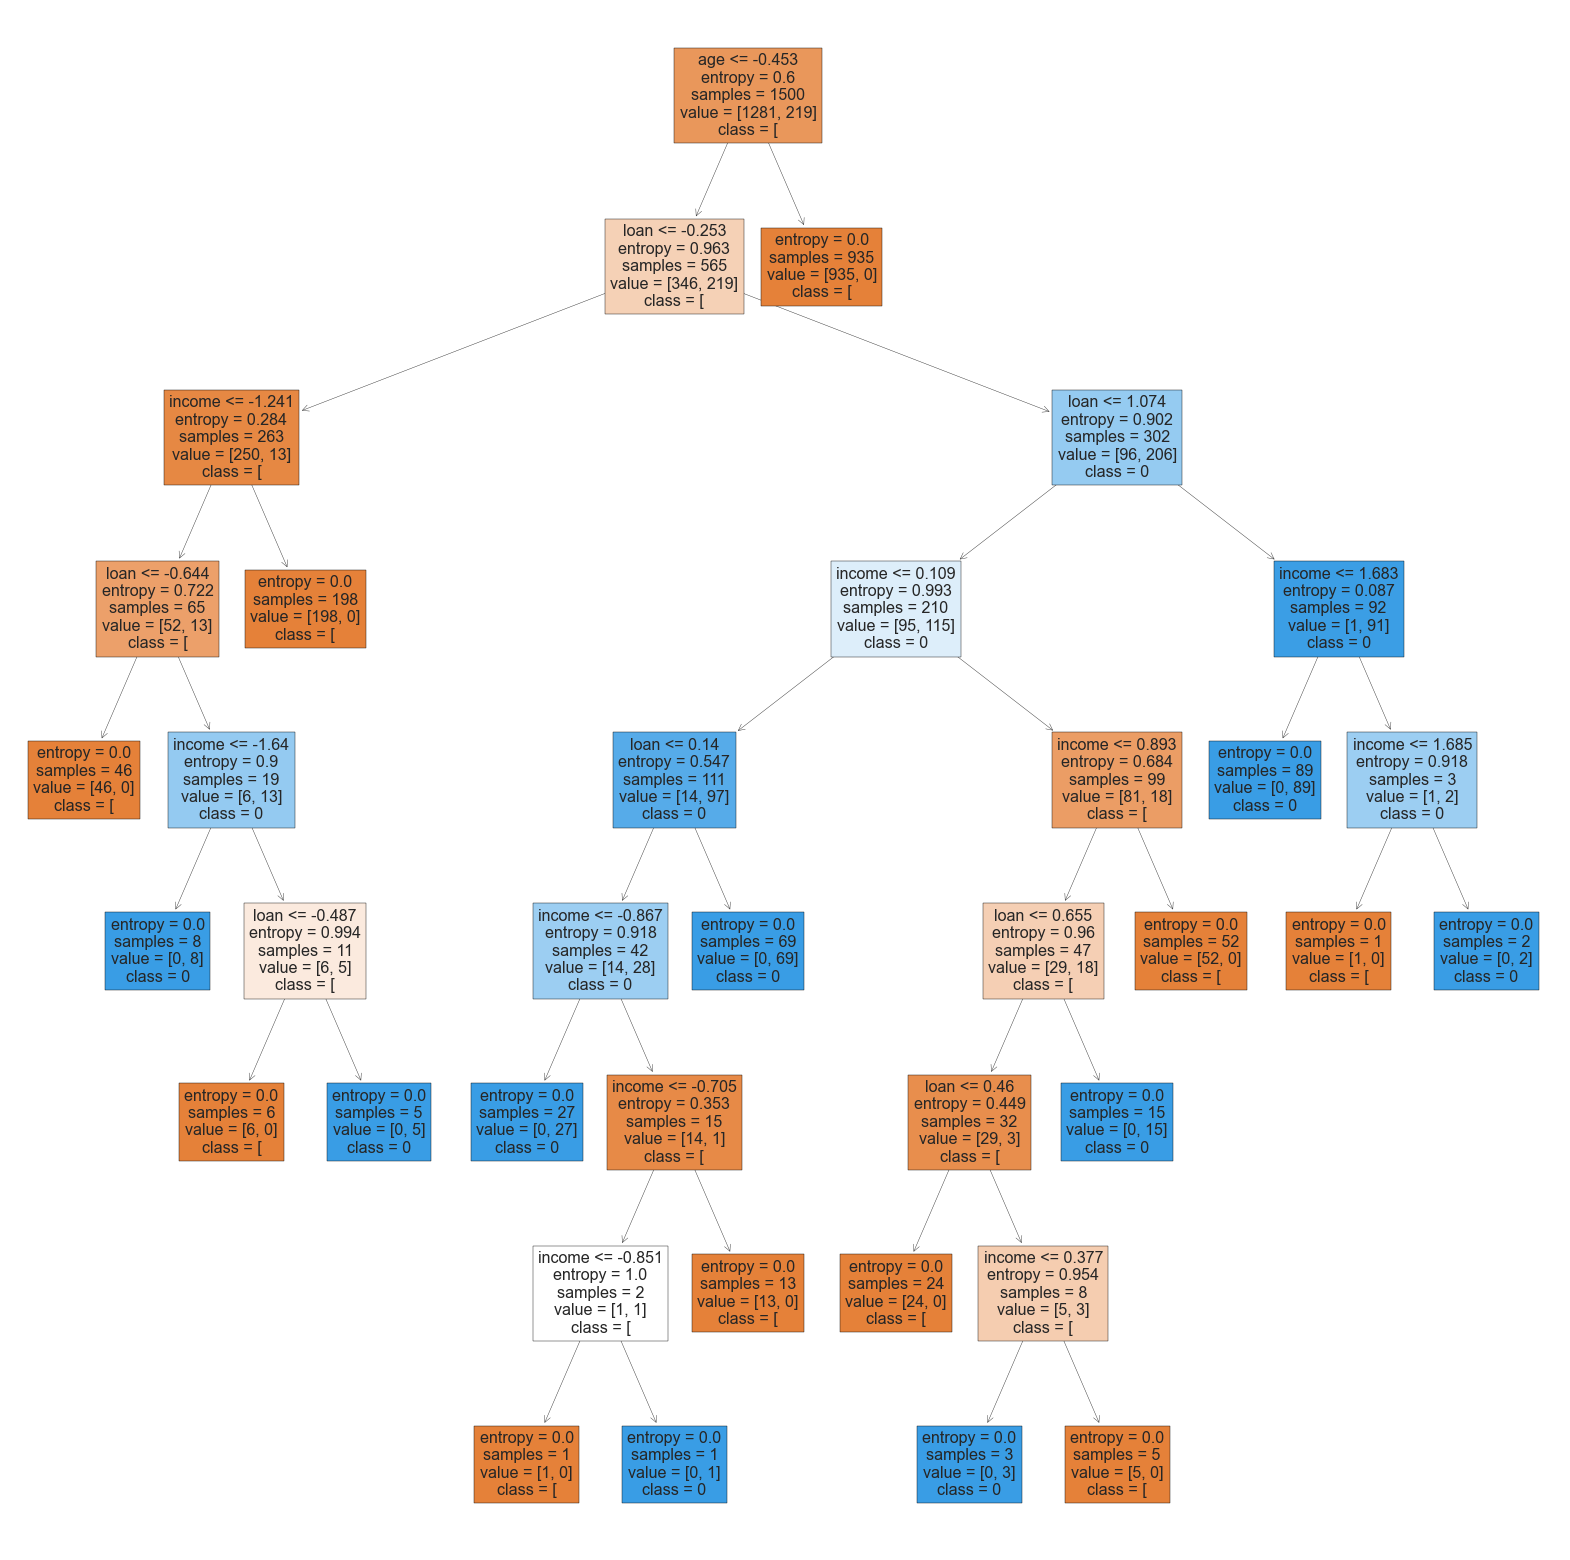

In [18]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names = previsores, class_names = list(str(arvore_credit.classes_)), filled=True);
fig.savefig('arvore_credit.png')

## Árvore de decisão - base census

In [19]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [20]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [21]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [22]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(x_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
previsoes = arvore_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [24]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [25]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

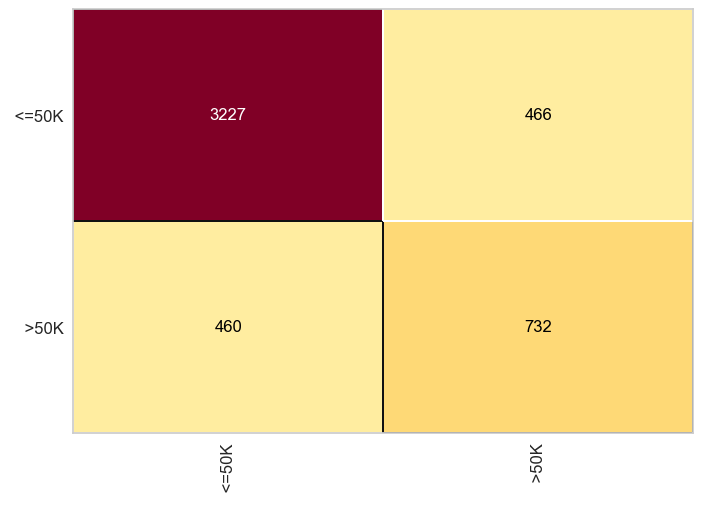

In [26]:
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [27]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



## Árvore de decisão - Random Forest

Aqui em vez de usar apenas uma árvore de decisão, usaremos várias, para se ter uma maior precisão, de forma que que usa a média (regrssão) ou votos da maioria (classificação) para dar a resposta final.

Ele escolherá de forma aleatória K atributos para comparação da métrica de pureza/impureza (impureza de gini/entropia). Caso K=3, então haverá 3 árvores e cada árvore terá uma combinação de atributos diferentes de forma aleatória.

### Random Forest - Base de crédito

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
random_forest_credit = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
random_forest_credit.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [30]:
previsoes = random_forest_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
accuracy_score(y_credit_teste, previsoes)

0.984

0.984

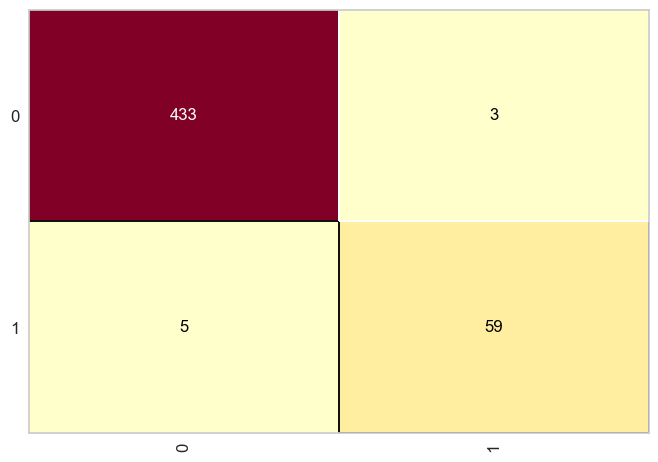

In [33]:
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [34]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



### Random Forest - Base census

In [35]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [36]:
previsoes = random_forest_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [37]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [38]:
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

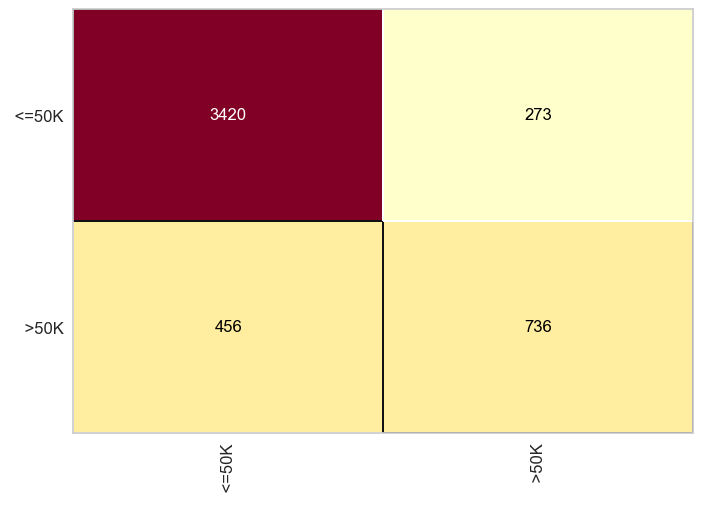

In [39]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [40]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

